In [55]:
import profilom_module_ as pf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.patches as patches
import numpy as np
import os

from matplotlib.animation import FuncAnimation, PillowWriter
import imageio

In [56]:
df_perfiles = pd.read_csv('../pruebas_perfilometria/perfiles_2.csv')
diccionario_perfiles = {i: group[['X', 'Y']].values for i, group in df_perfiles.groupby('Array_ID')}

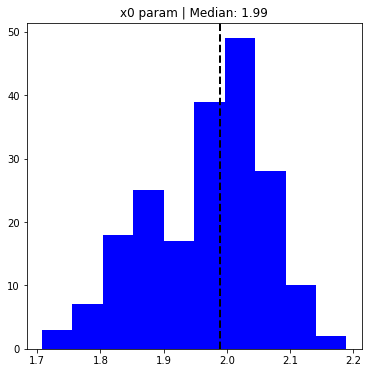

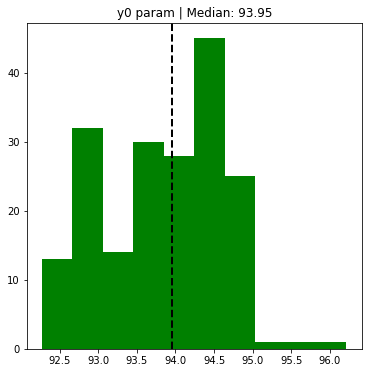

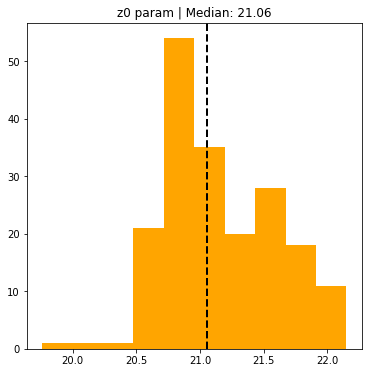

In [57]:
x0s = []
y0s = []
r0s = []

for i in range(200):
    perfil = diccionario_perfiles[i]
    coords_filt = pf.filter_coordinates(perfil, [-20, 25], [80, 130])
    x0, y0, r0 = pf.fit_circle(coords_filt)
    x0s.append(x0)
    y0s.append(y0)
    r0s.append(r0)

x0s = pf.remove_outliers_IQR_meth(x0s)
y0s = pf.remove_outliers_IQR_meth(y0s)
r0s = pf.remove_outliers_IQR_meth(r0s)

x0median, y0median, r0median = np.median(x0s), np.median(y0s), np.median(r0s)


f,ax = plt.subplots(figsize=(6,6))
ax.hist(x0s, bins = 10, color='b')
ax.axvline(x=x0median, color='k', linestyle='dashed', linewidth=2)
plt.title(f'x0 param | Median: {x0median:.2f}')
plt.show()

f,ax = plt.subplots(figsize=(6,6))
ax.hist(y0s, bins = 10, color='g')
ax.axvline(x=y0median, color='k', linestyle='dashed', linewidth=2)
plt.title(f'y0 param | Median: {y0median:.2f}')
plt.show()

f,ax = plt.subplots(figsize=(6,6))
ax.hist(r0s, bins = 10, color='orange')
ax.axvline(x=r0median, color='k', linestyle='dashed', linewidth=2)
plt.title(f'z0 param | Median: {r0median:.2f}')
plt.show()


In [58]:
for i in range(20):
    fig, ax = plt.subplots(figsize=(6, 6), facecolor='white')

    ax.set_xlim(-40, 40)
    ax.set_ylim(60, 140)
    ax.axis('off')
    ax.set_aspect('equal')

    perfil = diccionario_perfiles[i]
    ax.scatter(perfil[:, 0], perfil[:, 1], s=1)

    plt.savefig(f'images/perfil_{i}.png', dpi=300,
                bbox_inches='tight', pad_inches=0)
    plt.close(fig)

images = sorted([f'images/{f}' for f in os.listdir('images') if f.endswith('.png')])
frames = [imageio.imread(f) for f in images]
imageio.mimsave("animacion.gif", frames, fps=10)

<ipython-input-58-48cd7c0ebba1>:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames = [imageio.imread(f) for f in images]


## Procedimiento

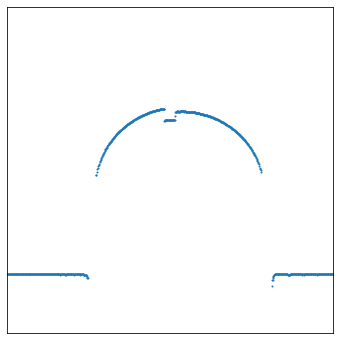

In [59]:
perfil = diccionario_perfiles[0]

f,ax = plt.subplots(figsize=(6,6))
ax.scatter(perfil[:,0], perfil[:,1], s = 1)
ax.set_xlim(-40, 40)
ax.set_ylim(60, 140)
# ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

plt.show()

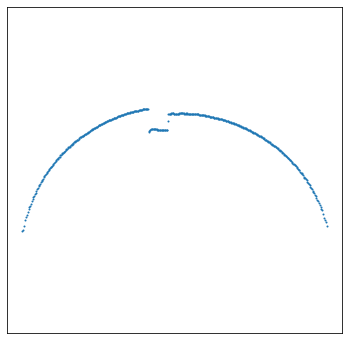

In [60]:
coords_filt = pf.filter_coordinates(perfil, [-20, 25], [80, 130])

f,ax = plt.subplots(figsize=(6,6))
ax.scatter(coords_filt[:,0], coords_filt[:,1], s = 1)
# ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('equal')
plt.show()


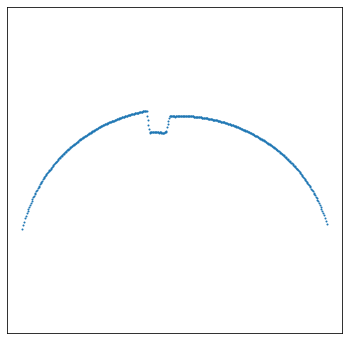

In [61]:
points_filt = pf.moving_average(coords_filt, window_size=5)

f,ax = plt.subplots(figsize=(6,6))
ax.scatter(points_filt[:,0], points_filt[:,1], s = 1)
# ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])

ax.axis('equal')
plt.show()

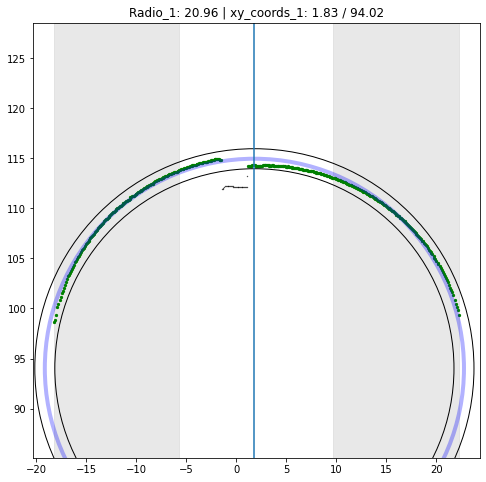

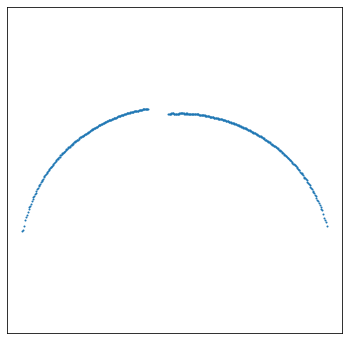

In [62]:
ps_en_aro, xc, yc, r = pf.get_circ_r_and_xyc(coords_filt, coords_filt, perc_list = [0, .3, .7, 1], R_tol=1, vis=True)

f,ax = plt.subplots(figsize=(6,6))
ax.scatter(ps_en_aro[:,0], ps_en_aro[:,1], s = 1)
# ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])

ax.axis('equal')
plt.show()

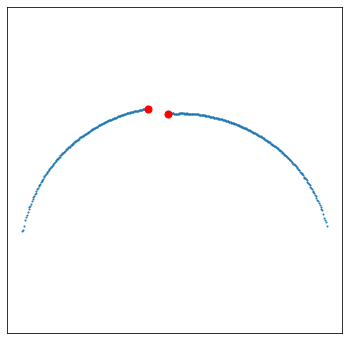

In [63]:
gap_points = pf.get_gap_pts(ps_en_aro)

f,ax = plt.subplots(figsize=(6,6))
ax.scatter(ps_en_aro[:,0], ps_en_aro[:,1], s = 1)
ax.scatter(gap_points[0,0], gap_points[0,1], color='red', s=50, label='Gap Point')
ax.scatter(gap_points[1,0], gap_points[1,1], color='red', s=50, label='Gap Point')

ax.axis('equal')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [64]:
for i in range(20):
    fig, ax = plt.subplots(figsize=(6, 6), facecolor='white')

    ax.set_xlim(-40, 40)
    ax.set_ylim(60, 140)
    # ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    perfil = diccionario_perfiles[i]
    ax.scatter(perfil[:, 0], perfil[:, 1], s=1)

    plt.savefig(f'images/perfil_{i}.png', dpi=300,
                bbox_inches='tight', pad_inches=0)
    plt.close(fig)

images = sorted([f'images/{f}' for f in os.listdir('images') if f.endswith('.png')])
frames = [imageio.imread(f) for f in images]
imageio.mimsave("animacion.gif", frames, fps=10)

<ipython-input-64-18d2401c4e65>:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames = [imageio.imread(f) for f in images]


In [65]:
for i in range(20):
    perfil = diccionario_perfiles[i]
    coords_filt = pf.filter_coordinates(perfil, [-20, 25], [80, 130])
    points_filt = pf.moving_average(coords_filt, window_size=5)
    ps_en_aro, xc, yc, r = pf.get_circ_r_and_xyc(coords_filt, coords_filt, perc_list = [0, .3, .7, 1], R_tol=1)
    gap_points = pf.get_gap_pts(ps_en_aro)

    fig, ax = plt.subplots(figsize=(6, 6), facecolor='white')
    ax.scatter(ps_en_aro[:,0], ps_en_aro[:,1], s = 1)
    ax.scatter(gap_points[0,0], gap_points[0,1], color='red', s=10, alpha=0.7)
    ax.scatter(gap_points[1,0], gap_points[1,1], color='red', s=10, alpha=0.7)
    
    ax.set_xlim(-40, 40)
    ax.set_ylim(60, 140)
    # ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.savefig(f'images/perfil_{i}.png', dpi=300,
                bbox_inches='tight', pad_inches=0)
    plt.close(fig)

images = sorted([f'images/{f}' for f in os.listdir('images') if f.endswith('.png')])
frames = [imageio.imread(f) for f in images]
imageio.mimsave("resultados.gif", frames, fps=10)


<ipython-input-65-f1d8033eeb9b>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames = [imageio.imread(f) for f in images]
